## Stochastic Hayes equation
$$\mathrm{d}{x}(t) = a \,x(t)\mathrm{d}t + \left(\beta \,x(t-1) + 1\right) \mathrm{d}W(t),$$
here 
$$ \mathbf{A}(t) \equiv \begin{bmatrix} a \end{bmatrix},
\quad \mathbf{B}_1(t) \equiv \begin{bmatrix}0\end{bmatrix},
\quad \mathbf{c}(t) \equiv \begin{bmatrix} 0 \end{bmatrix},$$<br>
$$ \boldsymbol{\alpha}^1(t) \equiv \begin{bmatrix} 0 \end{bmatrix},
\quad \boldsymbol{\beta}^1_1(t) \equiv \begin{bmatrix}\beta\end{bmatrix},
\quad \tau^1_1(t) \equiv 1 
\quad \mathrm{and} \quad \boldsymbol{\sigma}^1(t) \equiv \begin{bmatrix} \sigma \end{bmatrix}.$$

(First example in paper [1])

In [1]:
include("/mnt/E/BME_PHD/Research/Git/SemiDiscretization/StochasticSemiDiscretizationMethod.jl/src/StochasticSemiDiscretizationMethod.jl")

┌ Warning: Replacing docs for `Main.StochasticSemiDiscretizationMethod.toFunctionMXelements :: Union{}` in module `Main.StochasticSemiDiscretizationMethod`
└ @ Base.Docs docs/Docs.jl:223
┌ Warning: Replacing docs for `Main.StochasticSemiDiscretizationMethod.MxToCovVec :: Union{}` in module `Main.StochasticSemiDiscretizationMethod`
└ @ Base.Docs docs/Docs.jl:223
┌ Warning: Replacing docs for `Main.StochasticSemiDiscretizationMethod.VecToCovMx :: Union{}` in module `Main.StochasticSemiDiscretizationMethod`
└ @ Base.Docs docs/Docs.jl:223


Main.StochasticSemiDiscretizationMethod

In [2]:
using .StochasticSemiDiscretizationMethod

In [3]:
function createHayesProblem(a,β)
    AMx =  ProportionalMX(a*ones(1,1));
    τ1=1. 
    BMx1 = DelayMX(τ1,zeros(1,1));
    cVec = Additive(1)
    noiseID = 1
    αMx1 = stCoeffMX(noiseID,ProportionalMX(zeros(1,1)))
    βMx11 = stCoeffMX(noiseID,DelayMX(τ1,β*ones(1,1)))
    σ = stAdditive(1,Additive(ones(1)))
    LDDEProblem(AMx,[BMx1],[αMx1],[βMx11],cVec,[σ])
end

createHayesProblem (generic function with 1 method)

In [6]:
hayes_lddep=createHayesProblem(-6.,2.); # LDDE problem for Hayes equation
method=SemiDiscretization(0,0.1) # 0th order semi discretization with Δt=0.1
τmax=1. # the largest τ of the system
# Second Moment mapping
mapping=DiscreteMapping_M2(hayes_lddep,method,τmax,n_steps=10,calculate_additive=true); #The discrete mapping of the system

In [7]:
@show spectralRadiusOfMapping(mapping); # spectral radius ρ of the mapping matrix (ρ>1 unstable, ρ<1 stable)
statM2=VecToCovMx(fixPointOfMapping(mapping), length(mapping.M1_Vs[1])); # stationary second moment matrix of the hayes equation (equilibrium position)
@show statM2[1,1]

spectralRadiusOfMapping(mapping) = 0.3835887415448961


0.12505625506304247

### Stability borders of the Hayes Equation

In [8]:
using MDBM

using Plots
gr();
using LaTeXStrings

In [16]:
method=SemiDiscretization(0,0.1);
τmax=1.

foo(a,b) = log(spectralRadiusOfMapping(DiscreteMapping_M2(createHayesProblem(a,b),method,τmax,
    n_steps=10))); # No additive term calculated

axis=[Axis(-9.0:1.0,:a),
    Axis(-5.0:5.0,:β)]

iteration=4;
stab_border_points=getinterpolatedsolution(solve!(MDBM_Problem(foo,axis),iteration));

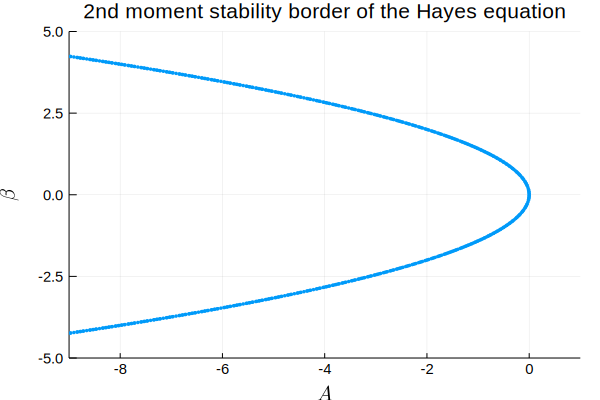

In [20]:
scatter(stab_border_points...,xlim=(-9.,1.),ylim=(-5.,5.),
    label="",title="2nd moment stability border of the Hayes equation",xlabel=L"A",ylabel=L"$\beta$",
    guidefontsize=14,tickfont = font(10),markersize=2,markerstrokewidth=0)

## Stochastic Linear Delay Oscillator
$$\dot{x}(t) = v(t)$$
$$\dot{v}(t) + 2\zeta v(t) + A x(t) = B x(t-2\pi) + \left(\alpha x(t) + \beta x(t-2\pi) + \sigma\right)\Gamma(t)$$
here 
$$ \mathbf{x}(t) = \begin{bmatrix} x(t) \\ v(t) \end{bmatrix},
\quad \mathbf{A}(t) \equiv \begin{bmatrix} 0 & 1 \\ -A & -2\zeta \end{bmatrix},
\quad \tau^1_1(t) \equiv 2\pi,
\quad \mathbf{B}_1(t) \equiv \begin{bmatrix}0 & 0\\ B & 0\end{bmatrix},
\quad \mathbf{c}(t) \equiv \begin{bmatrix} 0 \\ 0 \end{bmatrix},$$<br>
$$ \boldsymbol{\alpha}^1(t) \equiv \begin{bmatrix} 0 & 0 \\ \alpha & 0 \end{bmatrix},
\quad \tau^1_1(t) \equiv 2\pi 
\quad \boldsymbol{\beta}^1_1(t) \equiv \begin{bmatrix} 0 & 0 \\ \beta & 0\end{bmatrix},
\quad \mathrm{and} \quad \boldsymbol{\sigma}^1(t) \equiv \begin{bmatrix} 0 \\ \sigma\end{bmatrix}.$$

(Second example in paper [1])

In [22]:
function createSLDOProblem(A,B,ζ,α,β,σ)
    AMx =  ProportionalMX(@SMatrix [0. 1.;-A -2ζ]);
    τ1=2π 
    BMx1 = DelayMX(τ1,@SMatrix [0. 0.; B 0.]);
    cVec = Additive(2)
    noiseID = 1
    αMx1 = stCoeffMX(noiseID,ProportionalMX(@SMatrix [0. 0.; α 0.]))
    βMx11 = stCoeffMX(noiseID,DelayMX(τ1,@SMatrix [0. 0.; β 0.]))
    σVec = stAdditive(1,Additive(@SVector [0., σ]))
    LDDEProblem(AMx,[BMx1],[αMx1],[βMx11],cVec,[σVec])
end

createSLDOProblem (generic function with 1 method)

In [50]:
SLDOP_lddep=createSLDOProblem(1.,0.1,0.1,0.1,0.1,0.5); # LDDE problem for Hayes equation
method=SemiDiscretization(5,(2π+100eps())/10) # 5th order semi discretization with Δt=2π/10
τmax=2π # the largest τ of the system
# Second Moment mapping
mapping=DiscreteMapping_M2(SLDOP_lddep,method,τmax,n_steps=10,calculate_additive=true); #The discrete mapping of the system

In [51]:
@show spectralRadiusOfMapping(mapping); # spectral radius ρ of the mapping matrix (ρ>1 unstable, ρ<1 stable)
statM2=VecToCovMx(fixPointOfMapping(mapping), length(mapping.M1_Vs[1])); # stationary second moment matrix of the hayes equation (equilibrium position)
@show statM2[1,1] |> sqrt;

spectralRadiusOfMapping(mapping) = 0.5059591707964441
statM2[1, 1] |> sqrt = 0.9042071549857947


### Stability borders of the Delay Oscillator

In [8]:
using MDBM

using Plots
gr();
using LaTeXStrings

In [106]:
method=SemiDiscretization(5,2π/30);
τmax=2π+100eps()
idxs=[1,2,3:2:StochasticSemiDiscretizationMethod.rOfDelay(τmax,method)*2...]

# ζ=0.05, α=0.3*A, β=0.3*B
foo(A,B) = log(spectralRadiusOfMapping(DiscreteMapping_M2(createSLDOProblem(A,B,0.05,0.3*A,0.3*B,0.),method,τmax,idxs,
    n_steps=30),nev=8)); # No additive term calculated

axis=[Axis(-1.0:0.6:5.0,:A),
    Axis(LinRange(-1.5,1.5,12),:B)]

iteration=4;
stab_border_points=getinterpolatedsolution(solve!(MDBM_Problem(foo,axis),iteration));

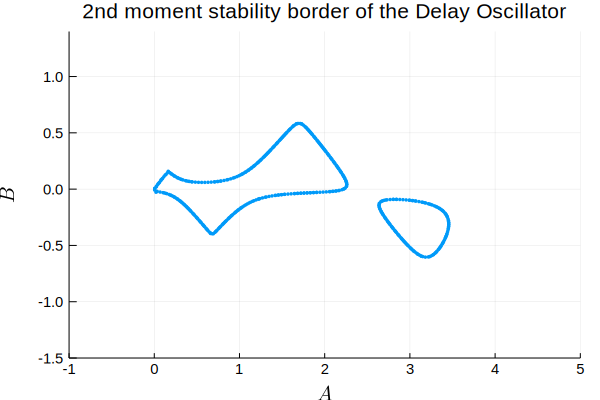

In [107]:
scatter(stab_border_points...,xlim=(-1.,5.),ylim=(-1.5,1.4),
    label="",title="2nd moment stability border of the Delay Oscillator",xlabel=L"A",ylabel=L"$B$",
    guidefontsize=14,tickfont = font(10),markersize=2,markerstrokewidth=0)